In [21]:
from sage.all import *
from fpylll import IntegerMatrix

#file generation

def gen_small(s, n):
	"""
	s+1 entries of 1s and s entries of -1s
	"""
	deg = n
	coeff_vector = deg*[0]
	coeff_vector[deg-1] = 1
	coeff_vector[0] = 1
	index_set = set({0,deg-1})
	for i in range(s-2):
	# add 1's
		while True:
			index1 = ZZ.random_element(1,deg-1)
			if not index1 in index_set:
				coeff_vector[index1] = 1
				index_set = index_set.union({index1})
				break
	# add -1's
	for i in range(s):
		while True:
			index2 = ZZ.random_element(1,deg-1)
			if not index2 in index_set:
				coeff_vector[index2] = -1
				index_set = index_set.union({index2})
				break
	return coeff_vector



def print_ntru(q, h, variable_x, filename):
	n = len(list(h))
	f = open(filename, 'w')
	f.write(str(q)+'\n')
	#f.write('[')
	HMat = [0]*n
	for i in range(n):
		hvector = list(h* variable_x**i)
		HMat[i] = hvector
		f.write( str(hvector).replace(',','') +'\n')
		#f.write( str(hvector)+'\n')
	#f.write(']')
	f.close()

	return HMat

def all_rotations(g, variable_x, q):
	n = len(list(g))
	rotations = [0]*(2*n)
	i = 0
	while i < n:
		rotations[2*i] = list(g*variable_x**i)
		rotations[2*i+1] = [-rotations[2*i][j] for j in range(len(rotations[2*i]))]
		for j in range(len(rotations[2*i])):
			if rotations[2*i][j] == q-1:
				rotations[2*i][j] = -1
			if rotations[2*i+1][j] == q-1:
				rotations[2*i+1][j] = -1
		i +=1
	return rotations

def gen_ntru_challenge(n,q=0):

	K = CyclotomicField(2*n)

	P = Primes()
	if (q==0):
		q = next_prime(55*n)


	F = GF(q)
	Fx = PolynomialRing(F, 'x')
	Fx_qou = Fx.quotient(K.polynomial(), 'x')
	variable_x = Fx_qou.gen()

	sparsity = ceil(n/3.)
	f_poly = (gen_small(sparsity, n))
	g_poly = (gen_small(sparsity, n))
	h = Fx_qou(f_poly)/Fx_qou(g_poly)

	rotations = all_rotations(Fx_qou(f_poly),variable_x,q)

	#print('g*h', Fx_qou(g_poly)*h)

	filename = 'ntru_n_'+str(n)+'.txt'
	Hmat = print_ntru(q, h, variable_x, filename)
	Hmat = matrix(ZZ,[hrow for hrow in Hmat])

	#print(len(Hmat), "is Hmat")
	print(len(vector(ZZ,g_poly)))
	
	qvec = vector(ZZ,g_poly)*Hmat - vector(f_poly)
	assert(len(qvec) == n)
	#print("qvec:", qvec)
	qvec_red = [0]*int(n)
	for i in range(n):
		assert qvec_red[i] % q == 0
		qvec_red[i]  = -qvec[i] / q
	#print("qvec_red:", qvec_red)
	B = matrix(ZZ, 2*n, 2*n)

	for i in range(n):
		B[i,i] = 1
		for j in range(n):
			B[i,j+n] = Hmat[i, j]
		B[i+n, i+n] = q
	#print("B:")
	#print(B)
	f_check = vector(list(g_poly) + list(qvec_red))*B
	#f_check = vector(ZZ, [f_check[i] for i in range(n)])
	#print(f_check, vector(f_poly))
	assert(f_check[:n]==vector(g_poly))
	assert(f_check[n:]==vector(f_poly))
	#print(norm(f_check))
	
	"""
	B = B.LLL()
	
	#print("B")
	#print(B)
	b0 = B[0]
	print('b0:', b0, norm(b0))

	print(Bred[0], norm(Bred[0]))

	for i in range(len(rotations)):
		if vector(b0) == vector(rotations[i]):
			print(i, rotations[i])
			break
	"""
	filename = 'ntru_n_'+str(n)+'_solution.txt'
	f = open(filename, 'w')
	f.write(str(list(f_poly)).replace(',','')+'\n')
	f.write(str(list(g_poly)).replace(',',''))
	f.close()

	return h, q
	
def ntru_plain_hybrid_basis(A, g, q, nsamples):
	"""
		Construct ntru lattice basis
	"""
	n = A.ncols
	ell = n - g
	print(n, ell, nsamples)
	B = IntegerMatrix((nsamples+ell), (ell+nsamples))
	Bg = IntegerMatrix(g, n)


	for i in range(ell):
		B[i,i] = 1
		for j in range(nsamples):
			B[i,j+n] = A[i, j]
	for i in range(nsamples):
		B[i+ell, i+ell] = q

	for i in range(g):
		for j in range(n):
			Bg[i,j] = A[i+ell, j]

	B = LLL.reduction(B)
	return B, Bg

n=256; q=1832393
h,q = gen_ntru_challenge(n,q)
print(h,q)

256
1247101*x^255 + 1733806*x^254 + 628529*x^253 + 870882*x^252 + 1386203*x^251 + 1382793*x^250 + 885635*x^249 + 1603240*x^248 + 1361535*x^247 + 1321155*x^246 + 1413083*x^245 + 1781538*x^244 + 1225635*x^243 + 1003006*x^242 + 1273639*x^241 + 204103*x^240 + 897822*x^239 + 1146279*x^238 + 581322*x^237 + 1721363*x^236 + 1444033*x^235 + 649184*x^234 + 376646*x^233 + 110182*x^232 + 935729*x^231 + 540517*x^230 + 1048750*x^229 + 515362*x^228 + 135475*x^227 + 1179774*x^226 + 945603*x^225 + 334044*x^224 + 1121154*x^223 + 1310957*x^222 + 497567*x^221 + 1180832*x^220 + 1730951*x^219 + 191018*x^218 + 1720226*x^217 + 683482*x^216 + 620129*x^215 + 361688*x^214 + 1083453*x^213 + 1673970*x^212 + 1185435*x^211 + 67341*x^210 + 228339*x^209 + 152430*x^208 + 1726912*x^207 + 1754339*x^206 + 33557*x^205 + 1126566*x^204 + 1588233*x^203 + 495722*x^202 + 201081*x^201 + 1380680*x^200 + 1733081*x^199 + 1124966*x^198 + 1172437*x^197 + 1306326*x^196 + 1152647*x^195 + 996149*x^194 + 1730267*x^193 + 946211*x^192 + 17

In [22]:
from fpylll import *
from fpylll.algorithms.bkz2 import BKZReduction as BKZ2
from sage.modules.free_module_integer import IntegerLattice

def H_delta(x):
	#эвристика beta-root Hermite factor
	tmp =( x/(2*pi*e)*(pi*x)^(1/x) )^(1/(2*(x-1)))
	return tmp

def H_delta(x,precision=144):
	#эвристика beta-root Hermite factor
	tmp =( x/(2*pi*e)*(pi*x)^(1/x) )^(1/(2*(x-1))).n(precision)
	return tmp

def left_side(q,n,k):
	return 1/(k*(3*k-1))*(k/2*log(k/2/pi/e,2)+k*log(q,2)-n*log(n/2,2))

def find_param(n, q, old=False,logs=False):
    min_beta=Infinity
    min_k = int(n/8)
    L=35; R=2*n
    
    while abs(L-R)>1:
        beta=int(L+(R-L)/2)
        
        if logs:
            print("now:",L,beta,R)
            
        delta_beta =log(H_delta(beta),2)
        
        flag_k_found=False
        if not old:
            l=max([beta,1/2*n]); r=2*n

            flag_k_found=False

            while abs(l-r)>1:
                k=int(l+(r-l)/2)
                tmp=left_side(q,n,k)

                #если мы нашли новый минимум k, то поиск продолжается не правее
                if tmp >= delta_beta:
                    flag_k_found=True
                    min_beta = beta
                    min_k = k
                    
                    if logs:
                        print(min_k, min_beta)
                        
                    r=k
                #иначе поиск происходит там, где tmp-delta_beta больше
                else:
                    left_=left_side(q,n,k-1)-delta_beta
                    right_=left_side(q,n,k+1)-delta_beta
                    if left_-right_<0:
                        l=k+1
                    else:
                        r=k
        
        else:
            for k in range(max(beta,min_k), 2*n, 10):
                tmp=left_side(q,n,k)
                if tmp >=delta_beta:
                    min_beta = beta
                    min_k = k
                    print( min_k, min_beta)
                    flag_k_found=True
                    break
        #если для данной бэта есть решение, то ищем новое не правее
        if flag_k_found:
            R=beta
        #иначе ищем решение правее
        else:
            L=beta+1
    return min_k, min_beta

def CenteredMod(a, q):
    a = a.mod(q)
    if a <= floor(q/2):
        return a
    else:
        return a-q
    
def read_ntru_from_file(filename):

    data = open(filename, "r").readlines()
    q = ZZ(data[0])
    H = eval(",".join([s_.replace('\n','').replace(" ", ", ") for s_ in data[1 :]]))
    
    n=len(H)
    H_=matrix(n)
    #print(H_)
    
    Zq = ZZ.quo(q)
    
    for t0 in range(0, n):
        for t1 in range(0, n):
            tmp=Zq(copy(H[t0][t1]))
            H_[t0,t1]=tmp
    
    return n, q, H_

path = 'ntru_n_'+str(n)+'.txt'
n, q, H = read_ntru_from_file(path)
print("n=", n, "q=",q)

k, beta = find_param(n,q)


print("k=", k, "beta=",beta)

import time
t=time.perf_counter()

H = IntegerMatrix.from_matrix(H)

print(time.perf_counter()-t, "sec taken")
C_Id = H
C_Id = Matrix(ZZ, [ [ CenteredMod(e, q) for e in C_Id[i] ] for i in range(n) ] )

print("Building basis of NTRU lattice...")
t=time.perf_counter()
B = block_matrix([ [ q*identity_matrix(n), zero_matrix(n) ], [ C_Id, identity_matrix(n) ] ] )
B = IntegerMatrix.from_matrix(B)
print(time.perf_counter()-t, "sec taken")

n= 256 q= 1832393
k= 129 beta= 36
12.957233299999643 sec taken
Building basis of NTRU lattice...
53.24068149999948 sec taken


In [23]:
### PREPROC PHASE FOR FPYLLL ###
k=200; beta=40

print("Building submatrix of size 2*k =", 2*k, "...")
TIME = time.time()
Bk = B.submatrix(range(n-k,n+k), range(n-k,n+k)) # ~30s
FPLLL.set_precision(240) 
GSO_Bk = GSO.Mat(Bk, float_type='mpfr')
print("Preprocessing...")
Bk_BKZ = BKZ2(GSO_Bk) 
print("Done. time: ", (time.time() - TIME))   

### BKZ PHASE ###
flags = BKZ.AUTO_ABORT|BKZ.GH_BND|BKZ.VERBOSE#|BKZ.MAX_LOOPS
#beta = 9
par = BKZ.Param(block_size=beta, strategies=BKZ.DEFAULT_STRATEGY, flags=flags)
print("BKZ reduction with beta =", beta, "...")
TIME = time.time()
DONE = Bk_BKZ(par) #actual BKZ algorithm; updates Bk in place; ~15 hours
# if it fails because infinite loop in babai, set higher precision in FPLLL.set_precision() and rerun without restarting.
print("Done. time: ", (time.time() - TIME))

### WE WON ###
print( all(Bk[i].norm() < 2^24 for i in range(k)) )

Building submatrix of size 2*k = 400 ...
Preprocessing...
Done. time:  65.78902959823608
BKZ reduction with beta = 40 ...
{"i":        0,  "cputime":  402.156,  "walltime":  402.882,  "preproc":  393.703,  "svp": 0.421875,  "#enum":   2^23.4,  "lll":  393.609,  "pruner": 0.046875,  "r_0":   2^20.5,  "/": 0.039242}
{"i":        1,  "cputime":  342.031,  "walltime":  342.231,  "preproc":  333.328,  "svp": 0.437500,  "#enum":   2^23.2,  "lll":  333.281,  "pruner": 0.046875,  "r_0":   2^20.2,  "/": 0.040103}
{"i":        2,  "cputime":  308.719,  "walltime":  308.883,  "preproc":  299.828,  "svp": 0.390625,  "#enum":   2^23.2,  "lll":  299.797,  "pruner": 0.046875,  "r_0":   2^19.7,  "/": 0.040762}
{"i":        3,  "cputime":  289.234,  "walltime":  289.502,  "preproc":  280.094,  "svp": 0.359375,  "#enum":   2^23.3,  "lll":  279.984,  "pruner": 0.015625,  "r_0":   2^19.3,  "/": 0.041274}
{"i":        4,  "cputime":  272.016,  "walltime":  272.180,  "preproc":  263.547,  "svp": 0.281250,  

{"i":       42,  "cputime":  167.609,  "walltime":  168.809,  "preproc":  160.031,  "svp": 0.093750,  "#enum":   2^21.2,  "lll":  160.031,  "pruner": 0.031250,  "r_0":   2^17.1,  "/": 0.043903}
{"i":       43,  "cputime":  158.281,  "walltime":  159.117,  "preproc":  151.406,  "svp": 0.125000,  "#enum":   2^21.3,  "lll":  151.359,  "pruner": 0.015625,  "r_0":   2^17.1,  "/": 0.043902}
{"i":       44,  "cputime":  169.828,  "walltime":  170.740,  "preproc":  162.094,  "svp": 0.203125,  "#enum":   2^21.3,  "lll":  162.031,  "pruner": 0.015625,  "r_0":   2^17.1,  "/": 0.043906}
{"i":       45,  "cputime":  185.141,  "walltime":  186.220,  "preproc":  176.906,  "svp": 0.125000,  "#enum":   2^21.4,  "lll":  176.828,  "pruner": 0.046875,  "r_0":   2^17.1,  "/": 0.043926}
{"i":       46,  "cputime":  167.312,  "walltime":  168.368,  "preproc":  159.500,  "svp": 0.093750,  "#enum":   2^21.2,  "lll":  159.453,  "pruner": 0.031250,  "r_0":   2^17.1,  "/": 0.043929}
{"i":       47,  "cputime":  1

In [29]:
def write_basis(B, q, filename):
    f = open(filename, 'w')
    f.write(str(q)+'\n')
    for t in B:
        tmp=str(t).replace(',','') +'\n'
        f.write( tmp )
    f.close()

write_basis(Bk,q,'BKZ_n'+str(n)+'.txt')

In [5]:
"""H=H_delta(beta).n()
for t in range(1, Bk.ncols):
    tmp=sqrt(Bk[t].norm()/Bk[t-1].norm())
    print("Hermit: ", tmp , "ratio: ", tmp/H)"""

'H=H_delta(beta).n()\nfor t in range(1, Bk.ncols):\n    tmp=sqrt(Bk[t].norm()/Bk[t-1].norm())\n    print("Hermit: ", tmp , "ratio: ", tmp/H)'

In [6]:
"""left=H^(-k*(3*k-1)) * Bk[0].norm()^k
left"""

'left=H^(-k*(3*k-1)) * Bk[0].norm()^k\nleft'

In [7]:
"""right=product([Bk[i].norm() for i in range(k)])
right"""

'right=product([Bk[i].norm() for i in range(k)])\nright'

In [41]:
#print(GSO_Bk.get_r(0,0))

3174.0


In [31]:
#GSO - квадрат нормы ортогонализации
GSO_Bk_new=GSO.Mat(Bk, float_type='mpfr')
lst=[(i,log(GSO_Bk.get_r(i,i),2)) for i in range(2*k)]

H=H_delta(beta).n()
H_exeremental=1
Rbig=RealField(256)

for t in range(1, 2*k):
    tmp=sqrt(Rbig(GSO_Bk.get_r(t-1,t-1)/GSO_Bk.get_r(t,t)))
    H_exeremental*=tmp
    print("Hermit: ", tmp , "norm: ", GSO_Bk.get_r(t-1,t-1))
H_exeremental=H_exeremental^(1/(2*k-1))

Hermit:  0.9996870772079902874204098908826475287102408510590880527164386800619124876904 norm:  139512.0
Hermit:  0.9537992124520137113536917072595223708653654163334962861159317442762468954474 norm:  139599.353969551
Hermit:  1.000818217386389688239787408285872217687530581180639807546376565122957666951 norm:  153450.91750383945
Hermit:  1.086035785768635289475862665562816472704066112863600367089876386057002463235 norm:  153200.11294745415
Hermit:  0.9608247008993886795694894475134766427518953858293165498688294294859072186966 norm:  129888.53360143532
Hermit:  1.030506944957195647100900804074341149446632102100252080695311174255519274693 norm:  140696.24116921047
Hermit:  1.060814649506893515665393670595728806798108712597642165536965045285575051629 norm:  132489.2522558664
Hermit:  0.9785052227703472575813402820201985470253539151495094023999507997839802019488 norm:  117733.92748579333
Hermit:  1.041460604407850356791669431212130096391141350040960014949374146845958208029 norm:  122963.2506

In [7]:
#left=( log(H,2)*(-k*(3*k-1))+log(Bk[0].norm(),2)*k).n()
left=( log(H,1/2)*(-k*(3*k-1))+log(Bk[0].norm(),2)*k/2).n()
print(left)

right=sum([log(GSO_Bk.get_r(i+k,i+k),2)/2 for i in range(k)]).n()
left_=( log(H_exeremental,2)*(-k*(3*k-1))+log(Bk[0].norm(),2)*k/2).n()
print(left_, right)



1071.01914225900
1433.39512031675 1278.92812034422


In [8]:
H_exeremental, 1/H

(0.9823344867767242099008264075410619513009598652089573088292605054939555687301,
 0.987626608873453)

In [101]:
a = sum([log(GSO_Bk.get_r(i,i),2)/2 for i in range(k)]).n()-log(Bk[0].norm(),2).n()*(k/2)

In [102]:
a- ( log(H_exeremental,2)*(-k*k/10) ).n()

-713.416821265008 + 57.2212720569770*I

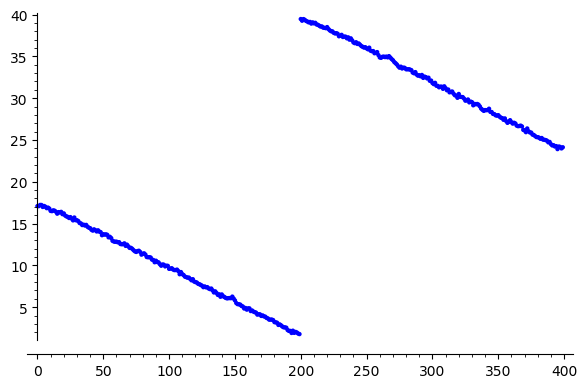

In [32]:
list_plot(lst)